In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## SNAP & Displacement

In [2]:
# read text file into pandas DataFrame
X_gate_2_5 = pd.read_csv("../../data/X_gate/5_photons/SNAP_Disp/(2,5).txt", sep=",")
X_gate_3_4 = pd.read_csv("../../data/X_gate/5_photons/SNAP_Disp/(3,4).txt", sep=",")
X_gate_2_3_and_4_5 = pd.read_csv("../../data/X_gate/5_photons/SNAP_Disp/(2,3)_(4,5).txt", sep=",")

In [3]:
X_gate_2_5

,fidelity,N_blocks
0,0.081055,1
1,0.384149,1
2,0.384149,1
3,0.555556,1
4,0.555556,1
...,...,...
95,0.027051,5
96,0.005275,5
97,0.031963,5
98,0.003217,5


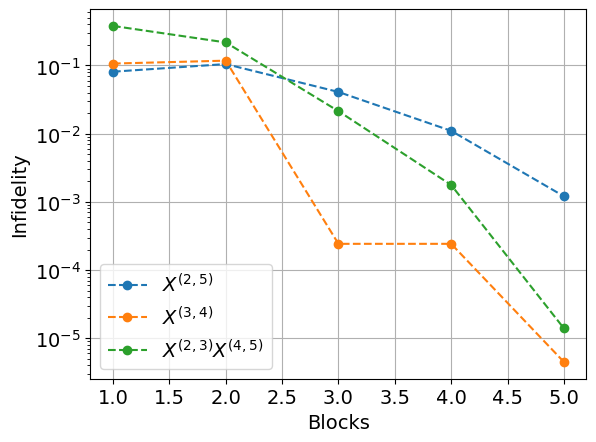

In [12]:
# plt.plot(X_gate_2_3.groupby(" N_blocks").mean()["fidelity"], label="(2,3)")
# plt.plot(X_gate_3_4.groupby(" N_blocks").mean()["fidelity"], label="(3,4)")
# plt.plot(X_gate_2_3_and_4_5.groupby(" N_blocks").mean()["fidelity"], label="[(2,3),(4,5)]")
plt.plot([1,2,3,4,5],X_gate_2_5.groupby(" N_blocks").min(), label=r"$X^{(2,5)}$", marker="o", linestyle='dashed')
plt.plot([1,2,3,4,5],X_gate_3_4.groupby("blocks").min(), label=r"$X^{(3,4)}$", marker="o", linestyle='dashed')
plt.plot([1,2,3,4,5],X_gate_2_3_and_4_5.groupby(" N_blocks").min(), label=r"$X^{(2,3)}X^{(4,5)}$", marker="o", linestyle='dashed')
plt.yscale("log")
plt.ylabel("Infidelity", fontsize=14)
plt.xlabel("Blocks", fontsize=14)
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid()
plt.savefig("SNAP_DISP_STATE_DEPENDENCY.pdf")
plt.show()


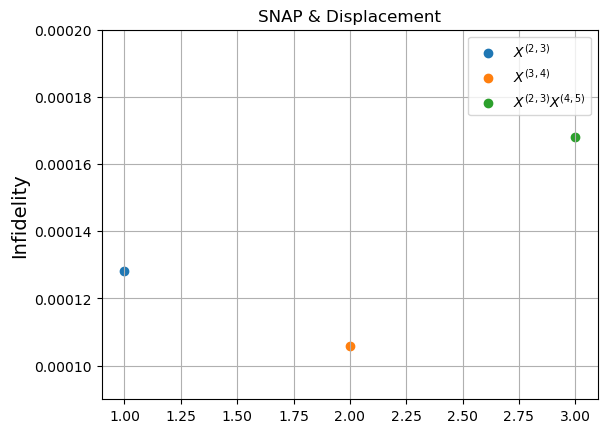

In [10]:
plt.scatter([1],0.00012812802525108413, label=r"$X^{(2,3)}$", marker="o")
plt.scatter([2],0.00010585119309025615, label=r"$X^{(3,4)}$", marker="o")
plt.scatter([3],0.00016809647285598306, label=r"$X^{(2,3)}X^{(4,5)}$", marker="o")
plt.ylabel("Infidelity", fontsize=14)
plt.title("SNAP & Displacement")
plt.ylim(0.9*1e-4, 0.2*1e-3)
plt.legend()
plt.grid()
plt.show()

## ECD

In [15]:
X_gate_2_5 = pd.read_csv("../../data/X_gate/5_photons/ECD/(2,5).txt", sep=',')
X_gate_3_4 = pd.read_csv("../../data/X_gate/5_photons/ECD/(3,4).txt", sep=',')
X_gate_2_3_and_4_5 = pd.read_csv("../../data/X_gate/5_photons/ECD/(2,3)_(4,5).txt", sep=',')

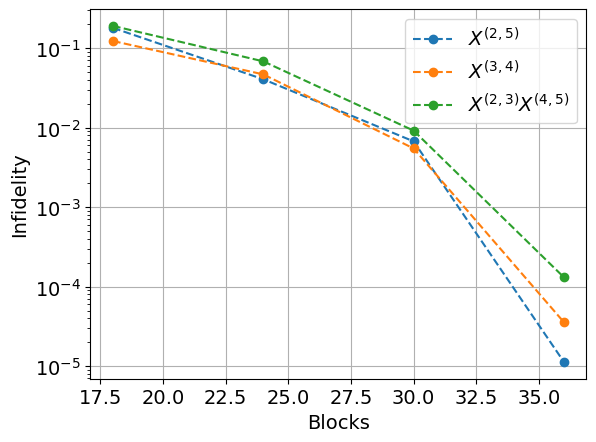

In [16]:
# plt.plot(X_gate_2_3.groupby(" N_blocks").mean()["fidelity"], label="(2,3)")
# plt.plot(X_gate_3_4.groupby(" N_blocks").mean()["fidelity"], label="(3,4)")
# plt.plot(X_gate_2_3_and_4_5.groupby(" N_blocks").mean()["fidelity"], label="[(2,3),(4,5)]")
plt.plot([18,24,30,36],X_gate_2_5.groupby("blocks").min()["fidelity"], label=r"$X^{(2,5)}$", marker="o", linestyle='dashed')
plt.plot([18,24,30,36],X_gate_3_4.groupby("blocks").min()["fidelity"], label=r"$X^{(3,4)}$", marker="o", linestyle='dashed')
plt.plot([18,24,30,36],X_gate_2_3_and_4_5.groupby("blocks").min()["fidelity"], label=r"$X^{(2,3)}X^{(4,5)}$", marker="o", linestyle='dashed')
plt.yscale("log")
plt.ylabel("Infidelity", fontsize=14)
plt.xlabel("Blocks", fontsize=14)
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid()
plt.savefig("ECD_STATE_DEPENDENCY.pdf")
plt.show()